# Data Manipulation 

This notebook illustrates key data manipulation/cleaning techniques : 

- Read file 
- Shuffle data 
- Filter data 
- Plot data 
- Split dataset (Training & Test ) 


In [1]:
!pip install numpy pandas matplotlib

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Read File 

In [3]:
df = pd.read_csv('data/iris_missing_data.csv')

In [6]:
# Dipslay top N rows 
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,NaN,1.4,0.3,Iris-setosa
7,5.0,3.4,NaN,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Replace Missing Values 
The dataset has missing values (`NaN`) we are going to fill in the missing values using the mean value.

In [11]:
df = df.fillna(df.mean(numeric_only=True))

In [12]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.500000,1.40000,0.200000,Iris-setosa
1,4.9,3.000000,1.40000,0.200000,Iris-setosa
2,4.7,3.200000,1.30000,0.200000,Iris-setosa
3,4.6,3.100000,1.50000,0.200000,Iris-setosa
4,5.0,3.600000,1.40000,0.200000,Iris-setosa
5,5.4,3.900000,1.70000,0.400000,Iris-setosa
6,4.6,3.056463,1.40000,0.300000,Iris-setosa
7,5.0,3.400000,3.74863,0.200000,Iris-setosa
8,4.4,2.900000,1.40000,0.200000,Iris-setosa
9,4.9,3.100000,1.50000,0.100000,Iris-setosa


In [14]:
df.shape

(150, 5)

## Shuffling Dataset
Since the dataset are group by class we need to shuffle the data and randomize the classes.

In [15]:
index_list = list(df.index)
print(index_list[:5])
print(index_list[-5:])

[0, 1, 2, 3, 4]
[145, 146, 147, 148, 149]


In [16]:
# Randomize a list
np.random.seed(5)
np.random.shuffle(index_list)

In [17]:
print('Shuffled list')
print(index_list[:5])
print(index_list[-5:])

Shuffled list
[82, 134, 114, 42, 109]
[8, 73, 144, 118, 99]


In [18]:
# Dataframe is now shuffled
# Let's access by index-position (iloc method)
df = df.iloc[index_list]

Now we can take a look at the head of the data, to see if the indices are shuffled. 

In [19]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,2.7,3.9,1.2,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor


## Splitting Dataset (Training & Test)

In [24]:
size = df.shape[0]
train = round(size * .7)
test = size - train
print(f'Original Dataset: {size} Train: {train} Test: {test}')

Original Dataset: 150 Train: 105 Test: 45


### Save Training Data 

In [26]:
df[:train].to_csv(
    'data/iris_train_data.csv',
    index=True,
    index_label='Row',
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

In [27]:
# Count number of unique class values
df['class'].value_counts()

class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: count, dtype: int64

## Plot Data 

Text(0.5, 1.0, 'Petal Length Histogram')

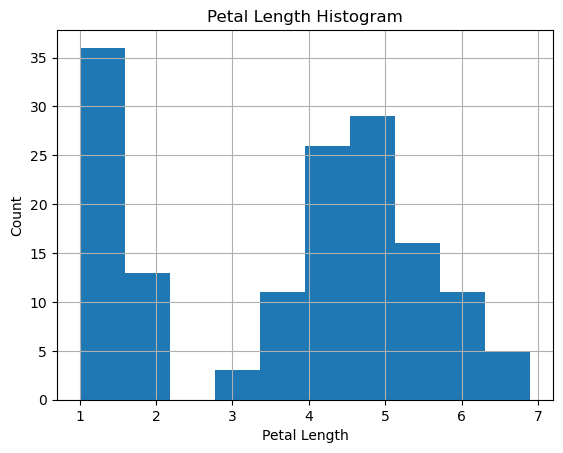

In [28]:
plt.hist(df.petal_length)
plt.grid(True)
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Petal Length Histogram')

In [ ]:
plt.scatter(df.index, df.petal_length)
plt.grid(True)
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')